In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\mrudu\DA\.ipynb_checkpoints\GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
df = df.dropna()
df['dt'] = pd.to_datetime(df['dt'])

latest_df = df.sort_values('dt').groupby('City').tail(1).copy()

def convert_lat(lat):
    return float(lat[:-1]) * (-1 if lat[-1] == 'S' else 1)

def convert_lon(lon):
    return float(lon[:-1]) * (-1 if lon[-1] == 'W' else 1)

latest_df['Latitude'] = latest_df['Latitude'].apply(convert_lat)
latest_df['Longitude'] = latest_df['Longitude'].apply(convert_lon)

climate_df = latest_df[['City', 'AverageTemperature', 'Latitude', 'Longitude']].copy()
climate_df.head()

,City,AverageTemperature,Latitude,Longitude
3103979,Ibirité,20.582,-20.09,-44.36
7863809,Uitenhage,15.392,-34.56,25.30
283478,Anantapur,27.524,15.27,77.50
160340,Alanya,27.254,36.17,31.82
239251,Ambarnath,26.953,18.48,72.68


In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(climate_df[['AverageTemperature', 'Latitude', 'Longitude']])

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
climate_df['Cluster'] = kmeans.fit_predict(scaled_data)
climate_df.head()

,City,AverageTemperature,Latitude,Longitude,Cluster
3103979,Ibirité,20.582,-20.09,-44.36,1
7863809,Uitenhage,15.392,-34.56,25.30,1
283478,Anantapur,27.524,15.27,77.50,0
160340,Alanya,27.254,36.17,31.82,0
239251,Ambarnath,26.953,18.48,72.68,0


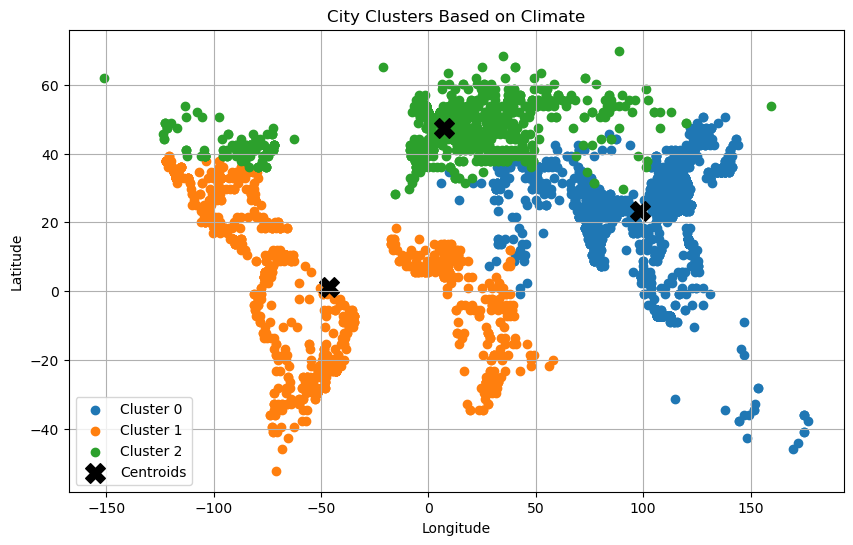

In [6]:
plt.figure(figsize=(10, 6))
for cluster in range(3):
    clustered_data = climate_df[climate_df['Cluster'] == cluster]
    plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'], label=f'Cluster {cluster}')

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 2], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.title('City Clusters Based on Climate')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
cluster_temps = climate_df.groupby('Cluster')['AverageTemperature'].mean()
print("Average temperature per cluster:\n", cluster_temps)

cluster_to_climate = {
    cluster_temps.idxmin(): 'Cold',
    cluster_temps.idxmax(): 'Warm',
    cluster_temps.index.difference([cluster_temps.idxmin(), cluster_temps.idxmax()])[0]: 'Moderate'
}

climate_df['Climate'] = climate_df['Cluster'].map(cluster_to_climate)
climate_df[['City', 'AverageTemperature', 'Climate']].head()

Average temperature per cluster:
 Cluster
0    27.289380
1    21.986055
2    19.704226
Name: AverageTemperature, dtype: float64


,City,AverageTemperature,Climate
3103979,Ibirité,20.582,Moderate
7863809,Uitenhage,15.392,Moderate
283478,Anantapur,27.524,Warm
160340,Alanya,27.254,Warm
239251,Ambarnath,26.953,Warm


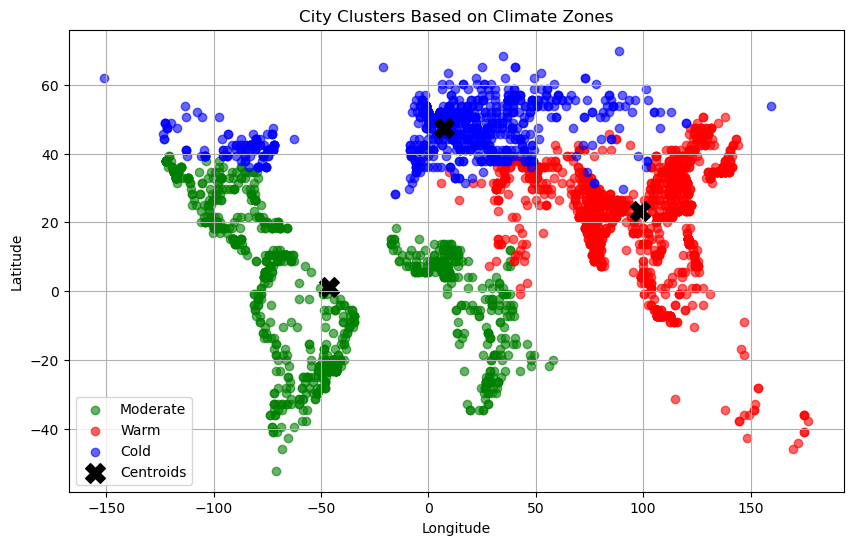

In [8]:
plt.figure(figsize=(10, 6))

colors = {'Cold': 'blue', 'Moderate': 'green', 'Warm': 'red'}

for climate in climate_df['Climate'].unique():
    data = climate_df[climate_df['Climate'] == climate]
    plt.scatter(data['Longitude'], data['Latitude'], 
                color=colors[climate], label=climate, alpha=0.6)

plt.scatter(centroids[:, 2], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.title('City Clusters Based on Climate Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

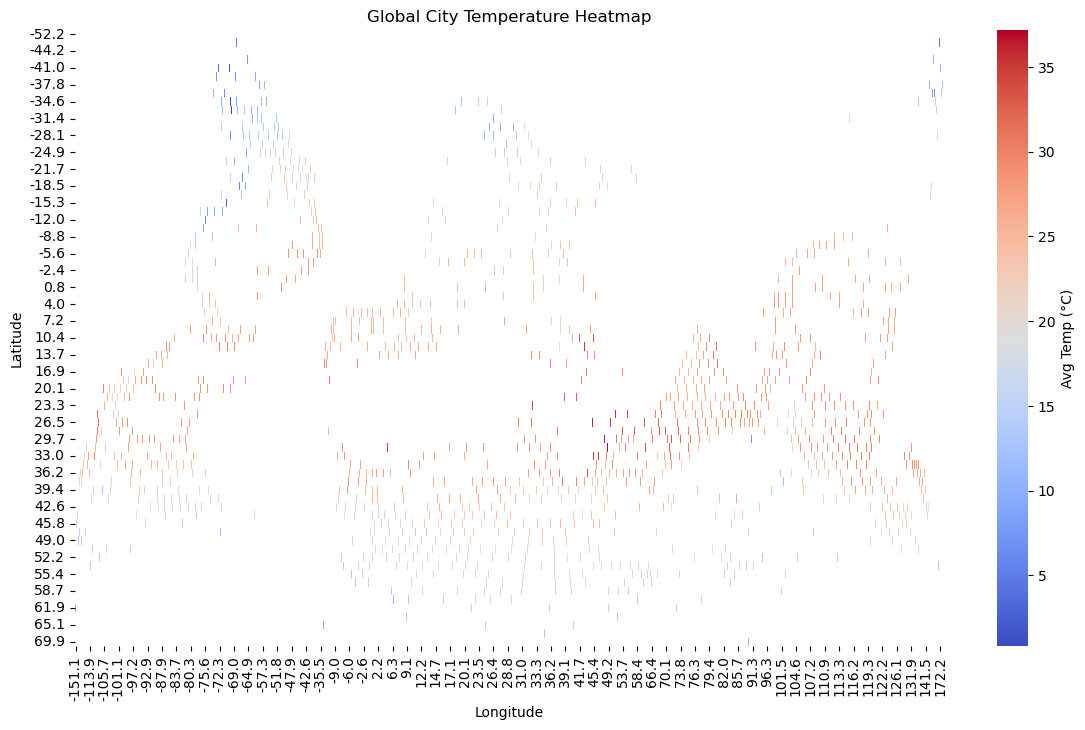

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

climate_df['Lat_round'] = climate_df['Latitude'].round(1)
climate_df['Lon_round'] = climate_df['Longitude'].round(1)

heatmap_data = climate_df.pivot_table(
    index='Lat_round',
    columns='Lon_round',
    values='AverageTemperature',
    aggfunc='mean'
)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Avg Temp (°C)'})
plt.title('Global City Temperature Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

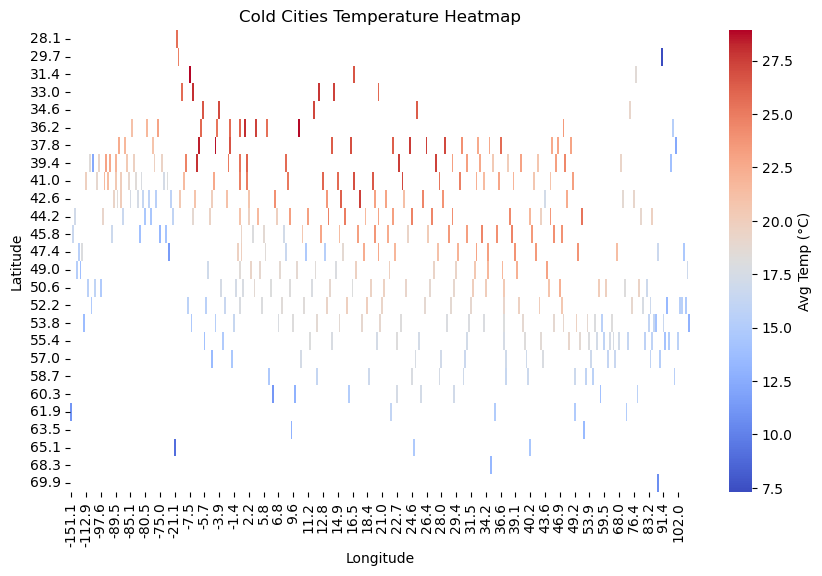

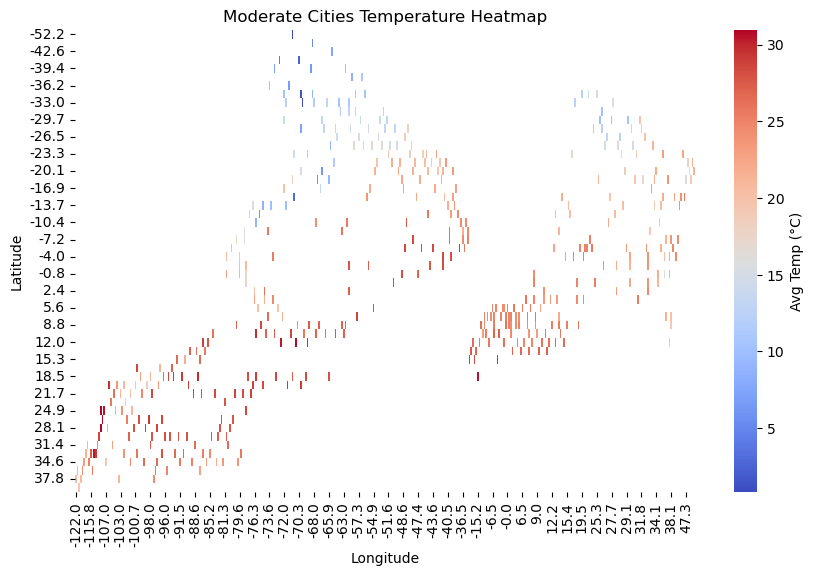

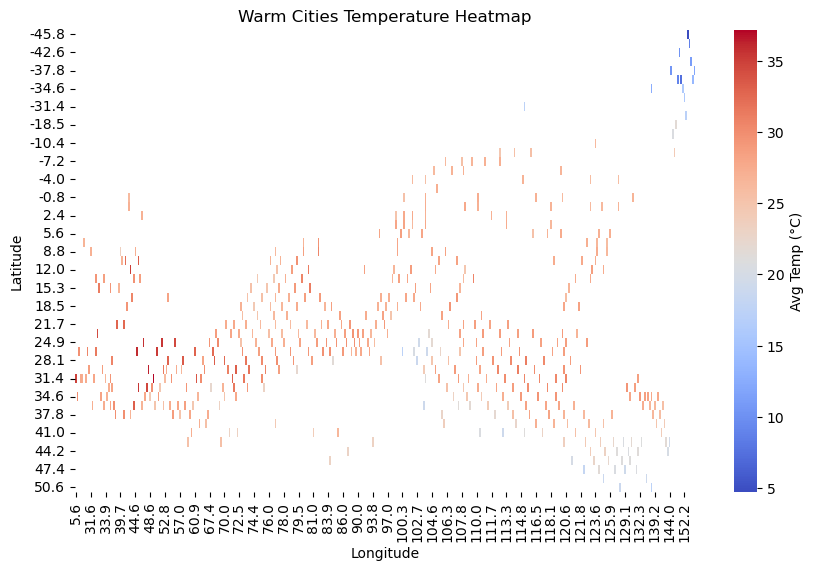

In [10]:
climate_df['Lat_round'] = climate_df['Latitude'].round(1)
climate_df['Lon_round'] = climate_df['Longitude'].round(1)

def plot_cluster_heatmap(climate_type):
    subset = climate_df[climate_df['Climate'] == climate_type]
    pivot_data = subset.pivot_table(
        index='Lat_round',
        columns='Lon_round',
        values='AverageTemperature',
        aggfunc='mean'
    )

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_data, cmap='coolwarm', cbar_kws={'label': 'Avg Temp (°C)'})
    plt.title(f'{climate_type} Cities Temperature Heatmap')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

for climate in ['Cold', 'Moderate', 'Warm']:
    plot_cluster_heatmap(climate)

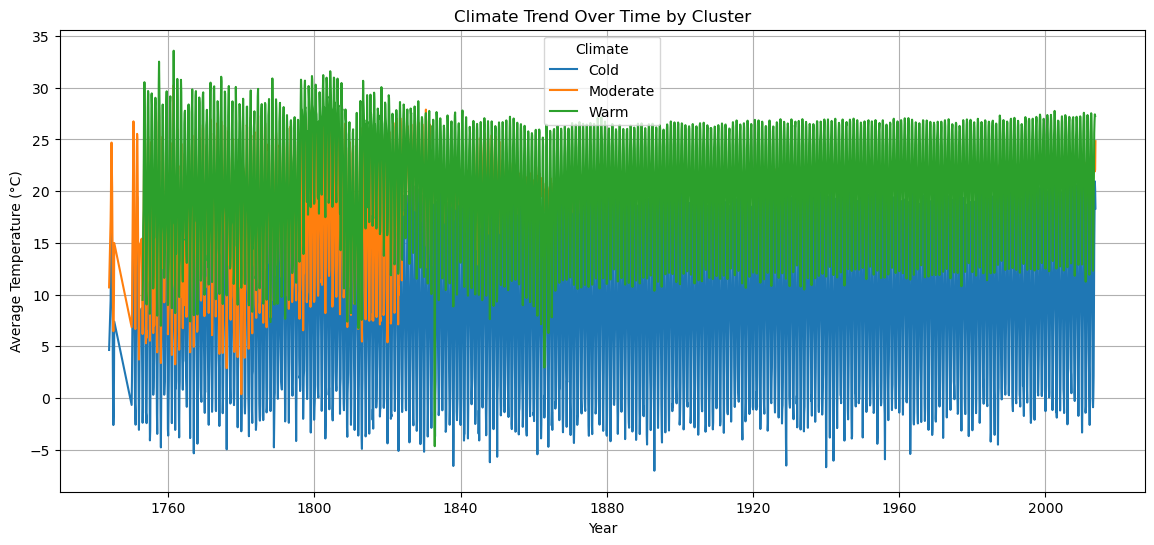

In [14]:
df = pd.read_csv(r"C:\Users\mrudu\DA\.ipynb_checkpoints\GlobalLandTemperaturesByCity.csv")
df = df.dropna()
df['dt'] = pd.to_datetime(df['dt'])

df['Latitude'] = df['Latitude'].apply(lambda x: float(x[:-1]) * (-1 if x[-1] == 'S' else 1))
df['Longitude'] = df['Longitude'].apply(lambda x: float(x[:-1]) * (-1 if x[-1] == 'W' else 1))

city_cluster_map = climate_df[['City', 'Cluster', 'Climate']]
merged_df = df.merge(city_cluster_map, on='City', how='inner')

trend_df = merged_df.groupby(['dt', 'Climate'])['AverageTemperature'].mean().reset_index()

import seaborn as sns
plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_df, x='dt', y='AverageTemperature', hue='Climate')
plt.title('Climate Trend Over Time by Cluster')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()